# Loan Approval Prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score

## EDA

### Import data

In [2]:
df = pd.read_csv(r'C:\Users\GaryNico\Downloads\Dataset\loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               957 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
Loan_Status          981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 99.7+ KB


### Normalization

In [4]:
df = df.drop(columns=['Loan_ID'])
categorical_columns = ['Gender', 'Married', 'Dependents','Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Amount_Term']
print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


### Visualization

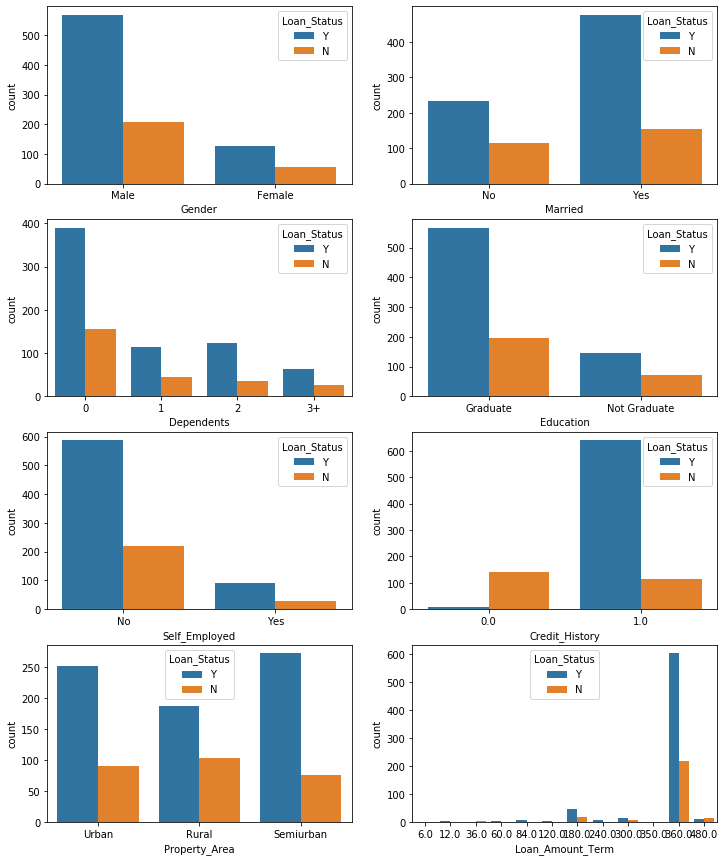

In [5]:
_, axes = plt.subplots(4,2, figsize =(12,15))
for idx, cat_col in enumerate(categorical_columns):
    row, col = idx//2, idx%2
    sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=axes[row,col])

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       981.000000         981.000000  954.000000
mean       5179.795107        1601.916330  142.511530
std        5695.104533        2718.772806   77.421743
min           0.000000           0.000000    9.000000
25%        2875.000000           0.000000  100.000000
50%        3800.000000        1110.000000  126.000000
75%        5516.000000        2365.000000  162.000000
max       81000.000000       41667.000000  700.000000


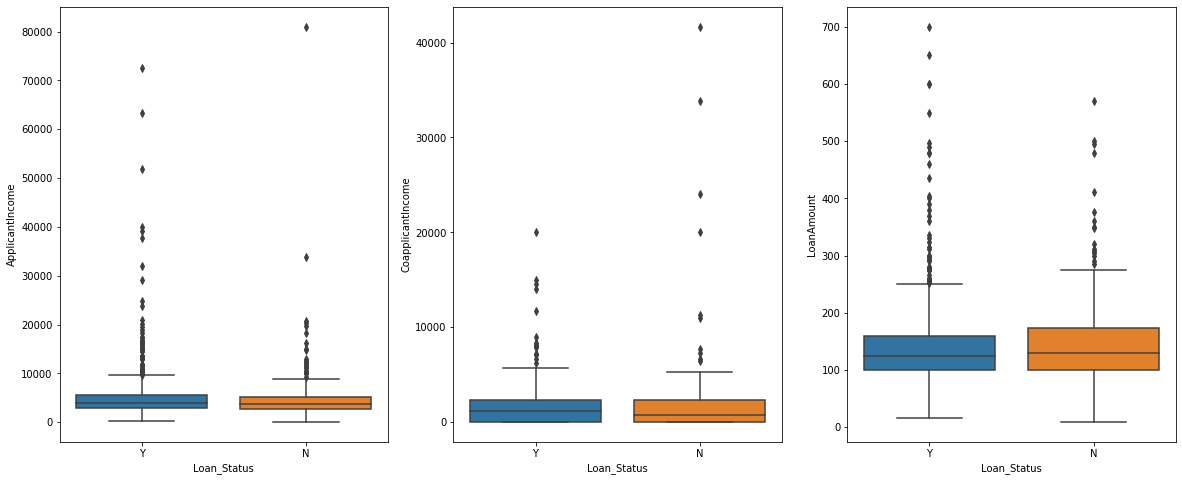

In [6]:
_, axes = plt.subplots(1,3,figsize=(20,8))
for idx, num_col in enumerate(numerical_columns):
    sns.boxplot(x='Loan_Status', y=num_col, data=df, ax=axes[idx])
print(df[numerical_columns].describe())

### Preprocessing Data

In [7]:
# Encoding Data
df_encoded = pd.get_dummies(df, drop_first='true')
df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


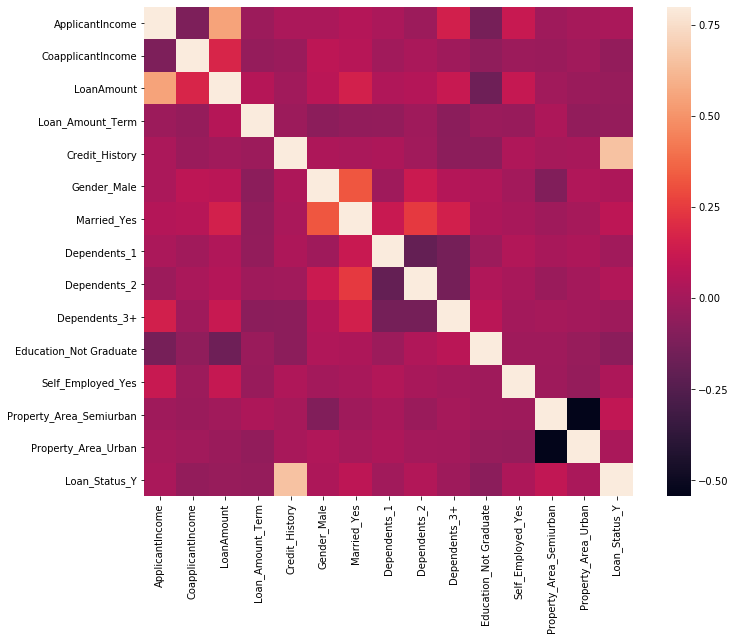

In [8]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df_encoded.corr(), vmax=.8, square=True)

### Split Data 

In [9]:
X = df_encoded.drop(columns=['Loan_Status_Y'])
y = df_encoded['Loan_Status_Y']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75, stratify=y, random_state=42)

### Handling Missing Values

In [11]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train_imp = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

## Model

### Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_imp, y_train)
y_pred = decision_tree.predict(X_test_imp)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7764227642276422


### Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_imp, y_train)
y_pred = random_forest.predict(X_test_imp)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8577235772357723


### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_imp, y_train)
y_pred = logreg.predict(X_test_imp)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8821138211382114


In [15]:
pd.to_pickle(logreg,r'C:\Users\GaryNico\Downloads\Dataset\pickle\new_model.pickle')

In [16]:
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Confusion Matrix on Test Data


Predicted,0,1,All
Actual,,,
0,40,27,67
1,2,177,179
All,42,204,246


In [17]:
y_pred = logreg.predict(X_test_imp).astype(int)
ApplicantIncome = X_test['ApplicantIncome']
CoapplicantIncome = X_test['CoapplicantIncome']
LoanAmount = X_test['LoanAmount']
Loan_Amount_Term = X_test['Loan_Amount_Term']
Credit_History = X_test['Credit_History']
Gender_M = X_test['Gender_Male']
Married_Yes = X_test['Married_Yes']
Dependents_1 = X_test['Dependents_1']
Dependents_2 = X_test['Dependents_2']
Dependents_3 = X_test['Dependents_3+']
Education_Not_Graduate = X_test['Education_Not Graduate']
Self_Employed_Yes = X_test['Self_Employed_Yes']
Property_Area_Semiurban = X_test['Property_Area_Semiurban']
Property_Area_Urban = X_test['Property_Area_Urban']
Loan_Status_Y = X_test['CoapplicantIncome']

pred = pd.DataFrame({'ApplicantIncome': ApplicantIncome,'CoapplicantIncome': CoapplicantIncome,'LoanAmount': LoanAmount,
                     'Loan_Amount_Term': Loan_Amount_Term,'Credit_History': Credit_History,
                     'Gender_Male': Gender_M,'Married_Yes': Married_Yes,'Dependents_1': Dependents_1,
                     'Dependents_2': Dependents_2,'Dependents_3': Dependents_3,'Education_Not Graduate': Education_Not_Graduate,
                     'Self_Employed_Yes': Self_Employed_Yes,'Property_Area_Semiurban': Property_Area_Semiurban,'Property_Area_Urban': Property_Area_Urban,
                     'Loan_Status_Prediction':y_pred })
pred.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Prediction
48,2645,3440.0,120.0,360.0,0.0,0,1,0,0,0,0,0,0,1,0
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1
754,4727,0.0,150.0,360.0,0.0,1,0,0,0,0,0,0,0,0,0
879,3579,3308.0,138.0,360.0,NaN,1,0,0,0,0,0,0,1,0,1
600,416,41667.0,350.0,180.0,NaN,0,0,0,0,1,0,0,0,1,1


## Prediction Simulation

In [18]:
# inp = {'ApplicantIncome': 20000,'CoapplicantIncome': 0,'LoanAmount': 5,
#                      'Loan_Amount_Term': 120,'Credit_History': 0,
#                      'Gender_Male': 0,'Married_Yes': 0,'Dependents_1': 0,
#                      'Dependents_2': 1,'Dependents_3': 0,'Education_Not Graduate': 1,
#                      'Self_Employed_Yes': 0,'Property_Area_Semiurban': 0,'Property_Area_Urban': 0}
# inp_df = pd.DataFrame(inp, index=[0])
# y_pred = logreg.predict(inp_df).astype(int)

# print(y_pred)

In [ ]:
pred = pd.DataFrame({'ApplicantIncome': ApplicantIncome,'CoapplicantIncome': CoapplicantIncome,'LoanAmount': LoanAmount,
                     'Loan_Amount_Term': Loan_Amount_Term,'Credit_History': Credit_History,
                     'Gender_M': Gender_M,'Married_Yes': Married_Yes,'Dependents_1': Dependents_1,
                     'Dependents_2': Dependents_2,'Dependents_3': Dependents_3,'Education_Not_Graduate': Education_Not_Graduate,
                     'Self_Employed_Yes': Self_Employed_Yes,'Property_Area_Semiurban': Property_Area_Semiurban,'Property_Area_Urban': Property_Area_Urban,
                     'Loan_Status_Prediction':y_pred })


print("Loan Approval Prediction")
print("========================")

ApplicantIncome = int(input("Applicant Income: "))

CoapplicantIncome = int(input("Coapplicant Income: "))

LoanAmount = int(input("Loan Amount: "))

Loan_Amount_Term = int(input("Loan Amount Term: "))

Gender = input("Gender[Male|Female]: ")
if Gender == 'Male':
    Gender_M = 1
else:
    Gender_M = 0

Married = input("Married[Yes|No]: ")
if Married == 'Yes':
    Married_Yes = 1
else:
    Married_Yes = 0

Dependents = int(input("Number of dependents: "))
if Dependents == 0:
    Dependents_1 = 0
    Dependents_2 = 0
    Dependents_3 = 0
elif Dependents == 1:
    Dependents_1 = 1
    Dependents_2 = 0
    Dependents_3 = 0
elif Dependents == 2:
    Dependents_1 = 0
    Dependents_2 = 1
    Dependents_3 = 0
elif Dependents > 3:
    Dependents_1 = 0
    Dependents_2 = 0
    Dependents_3 = 1

Education = input("Graduate Status[Yes|No]: ")
if Education == 'Yes':
    Education_Not_Graduate = 0
else:
    Education_Not_Graduate = 1
    
Education = input("Self Employed Status[Yes|No]: ")
if Education == 'Yes':
    Self_Employed_Yes = 1
else:
    Self_Employed_Yes = 0
    
Property_Area = input("Property Area[Urban|Semi Urban|Rural]: ")
if Property_Area == 'Urban':
    Property_Area_Urban = 1
    Property_Area_Semiurban = 0
elif Property_Area == 'Semi Urban':
    Property_Area_Urban = 0
    Property_Area_Semiurban = 1
else:
    Property_Area_Urban = 0
    Property_Area_Semiurban = 0

Loan Approval Prediction


In [ ]:
Credit_History = int(input("Credit History[0|1]: "))

In [ ]:
inp = {'ApplicantIncome': ApplicantIncome,'CoapplicantIncome': CoapplicantIncome,'LoanAmount': LoanAmount,
                     'Loan_Amount_Term': Loan_Amount_Term,'Credit_History': Credit_History,
                     'Gender_M': Gender_M,'Married_Yes': Married_Yes,'Dependents_1': Dependents_1,
                     'Dependents_2': Dependents_2,'Dependents_3': Dependents_3,'Education_Not_Graduate': Education_Not_Graduate,
                     'Self_Employed_Yes': Self_Employed_Yes,'Property_Area_Semiurban': Property_Area_Semiurban,'Property_Area_Urban': Property_Area_Urban}


inp_df = pd.DataFrame(inp, index=[0])
y_pred = logreg.predict(inp_df).astype(int)

if(y_pred == 0):
    print("Loan Status Rejected")
else: 
    print("Loan Status Approved")